# ДЗ 1. Байесовская генерация и автоэнкодеры

# 1. Байесовский генератор стилей

# Часть 1

Испльзуя данные о популярных стилях из файла styles.py написать генератор (можно в виде функции, можно ввите класа [generator](https://wiki.python.org/moin/Generators)):
1. Использует данные о стилях
2. На основе формулы MLE и формулы Байеса о полной вероятности генерировать случайный стиль
3. Так же вернуть вероятность генерации данного стиля

In [1]:
from styles import styles, styles_count
from stylist import Stylist  # see stylist.py for more details

stylist = Stylist(styles, styles_count)

In [2]:
for _ in range(5):
    stylist.suggest_style()
    print("\n")

Here is your style:

Прическа: длинные прямые
Цвет волос: рыжий
Аксесуар: круглые очки
Одежда: худи
Цвет одежды: черный

Probability of this combination: 0.00038


Here is your style:

Прическа: короткая курчавые
Цвет волос: рыжий
Аксесуар: солнцезащитные очки
Одежда: комбинезон
Цвет одежды: оранжевый

Probability of this combination: 0.00033


Here is your style:

Прическа: длинные прямые
Цвет волос: рыжий
Аксесуар: круглые очки
Одежда: футболка с круглым вырезом
Цвет одежды: серый

Probability of this combination: 0.00131


Here is your style:

Прическа: короткая прямые
Цвет волос: пастельный розовый
Аксесуар: солнцезащитные очки
Одежда: футболка с круглым вырезом
Цвет одежды: серый

Probability of this combination: 0.00023


Here is your style:

Прическа: длинные прямые
Цвет волос: серебристо серый
Аксесуар: круглые очки
Одежда: футболка с круглым вырезом
Цвет одежды: черный

Probability of this combination: 0.0026




# Часть 2

4. Используя в качестве фичей пиксели изображений аватаров (см папку avatars) написать генератор изображений, который генерирует новый аватар
5. Генератор выбирает значение каждого канала каждого пикселя используя распределение вероятностей, полученных на основе изображений avatars; генерация так же осуществляется с помощью MLE
6. Выложить в репозиторий 5 сгенерированных аватаров

In [3]:
import os

import cv2
import numpy as np
from PIL import Image


def load_images(dir, downscaling_factor=1):
    images = []
    for fname in os.listdir(dir):
        if fname.endswith(".png"):
            path = os.path.join(dir, fname)
            image = cv2.imread(path)
            # downscale images to accelerate generation
            if downscaling_factor < 1:
                image = cv2.resize(
                    image, (0, 0), fx=downscaling_factor, fy=downscaling_factor
                )
            images.append(image)
    return np.stack(images)

In [4]:
images = load_images("avatars", downscaling_factor=0.3)
images.shape

(11, 168, 158, 3)

In [5]:
from avatars import AvatarGenerator

avatar_gen = AvatarGenerator()
avatar_gen.fit(images)

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

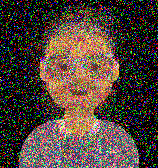

The probability of this image is: 0.0.
 The log-probability is -180723.44213867188


  0%|          | 0/168 [00:00<?, ?it/s]

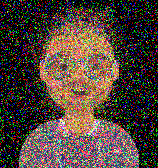

The probability of this image is: 0.0.
 The log-probability is -180784.1552734375


  0%|          | 0/168 [00:00<?, ?it/s]

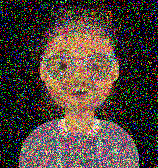

The probability of this image is: 0.0.
 The log-probability is -180060.162109375


  0%|          | 0/168 [00:00<?, ?it/s]

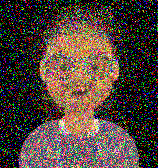

The probability of this image is: 0.0.
 The log-probability is -180295.86865234375


  0%|          | 0/168 [00:00<?, ?it/s]

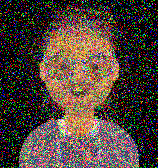

The probability of this image is: 0.0.
 The log-probability is -179187.12646484375


  0%|          | 0/168 [00:00<?, ?it/s]

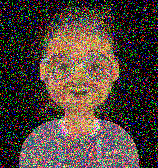

The probability of this image is: 0.0.
 The log-probability is -181018.86645507812


  0%|          | 0/168 [00:00<?, ?it/s]

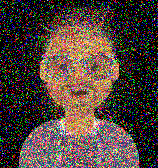

The probability of this image is: 0.0.
 The log-probability is -180445.9755859375


  0%|          | 0/168 [00:00<?, ?it/s]

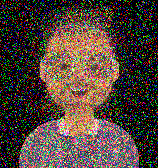

The probability of this image is: 0.0.
 The log-probability is -181805.63110351562


  0%|          | 0/168 [00:00<?, ?it/s]

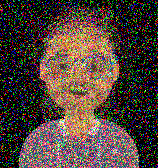

The probability of this image is: 0.0.
 The log-probability is -180590.626953125


  0%|          | 0/168 [00:00<?, ?it/s]

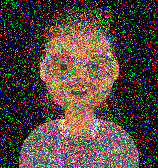

The probability of this image is: 0.0.
 The log-probability is -181328.67065429688


In [6]:
for _ in range(10):
    avatar_gen.generate(save=True)

Получившиеся картинки довольно похожи, но между ними все же можно найти различия (между картинками бОльшего размера визуальных различий было еще меньше).

Вероятности полученных картинок получились равными 0, т.к. пикселей много, и произведение такого количество чисел от 0 до 1 дало в результате очень маленькое число, дробная часть которого не поместилась во float32. Поэтому сравнивать можем только log-probabilities.